# About tidal deformabilities

Here we explore the difference between the component masses and the chirp mass and mass ratio.


In [35]:
import numpy as np 
import bilby 
import matplotlib.pyplot as plt
import corner
params = {"axes.grid": True,
        "text.usetex" : True,
        "font.family" : "serif",
        "ytick.color" : "black",
        "xtick.color" : "black",
        "axes.labelcolor" : "black",
        "axes.edgecolor" : "black",
        "font.serif" : ["Computer Modern Serif"],
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "axes.labelsize": 16,
        "legend.fontsize": 16,
        "legend.title_fontsize": 16,
        "figure.titlesize": 16}

plt.rcParams.update(params)

default_corner_kwargs = dict(bins=40, 
                        smooth=1., 
                        show_titles=False,
                        label_kwargs=dict(fontsize=16),
                        title_kwargs=dict(fontsize=16), 
                        color="blue",
                        # quantiles=[],
                        # levels=[0.9],
                        plot_density=True, 
                        plot_datapoints=False, 
                        fill_contours=True,
                        max_n_ticks=4, 
                        min_n_ticks=3,
                        save=False)

## Component masses to chirp mass and mass ratio

The following is in a range relevant for BBH events.

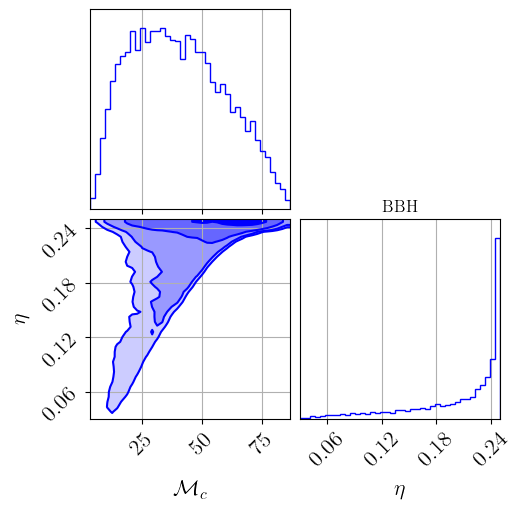

In [36]:
N = 10000 # number of samples

m1_prior = bilby.core.prior.Uniform(minimum = 3, maximum = 100)
m2_prior = bilby.core.prior.Uniform(minimum = 3, maximum = 100)

# Draw samples from the priors
m1_samples = m1_prior.sample(size = N)
m2_samples = m2_prior.sample(size = N)

# Swap samples if m1 < m2
swap = m1_samples < m2_samples
m1_samples[swap], m2_samples[swap] = m2_samples[swap], m1_samples[swap]

# Convert 
mc_samples = bilby.gw.conversion.component_masses_to_chirp_mass(m1_samples, m2_samples)
eta_samples = bilby.gw.conversion.component_masses_to_symmetric_mass_ratio(m1_samples, m2_samples)

# Make the plot
samples = np.vstack((mc_samples, eta_samples)).T
labels = [r"$\mathcal{M}_c$", r"$\eta$"]
fig = corner.corner(samples, labels = labels, **default_corner_kwargs)
plt.title("BBH")
plt.show()
plt.close()

# Get the limits, going to use them later
mc_lower_bound_BBH = np.min(mc_samples)
eta_lower_bound_BBH = np.min(eta_samples)

mc_upper_bound_BBH = np.max(mc_samples)
eta_upper_bound_BBH = np.max(eta_samples)

# Save samples for later
m1_samples_BBH = m1_samples
m2_samples_BBH = m2_samples

The following is in a range relevant for BNS events.

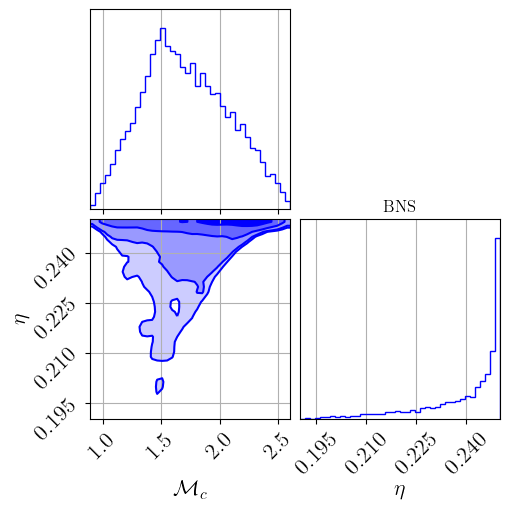

In [37]:
m1_prior = bilby.core.prior.Uniform(minimum = 1, maximum = 3)
m2_prior = bilby.core.prior.Uniform(minimum = 1, maximum = 3)

# Draw samples from the priors
m1_samples = m1_prior.sample(size = N)
m2_samples = m2_prior.sample(size = N)

# Swap samples if m1 < m2
swap = m1_samples < m2_samples
m1_samples[swap], m2_samples[swap] = m2_samples[swap], m1_samples[swap]

# Convert 
mc_samples = bilby.gw.conversion.component_masses_to_chirp_mass(m1_samples, m2_samples)
eta_samples = bilby.gw.conversion.component_masses_to_symmetric_mass_ratio(m1_samples, m2_samples)

# Plot
samples = np.vstack((mc_samples, eta_samples)).T
labels = [r"$\mathcal{M}_c$", r"$\eta$"]
fig = corner.corner(samples, labels = labels, **default_corner_kwargs)
plt.title("BNS")
plt.show()
plt.close()

# Get the limits, going to use them later
mc_lower_bound_BNS = np.min(mc_samples)
eta_lower_bound_BNS = np.min(eta_samples)

mc_upper_bound_BNS = np.max(mc_samples)
eta_upper_bound_BNS = np.max(eta_samples)

# Save samples for later
m1_samples_BNS = m1_samples
m2_samples_BNS = m2_samples

## Chirp mass and mass ratio to component masses

In a range for BBH, see above:

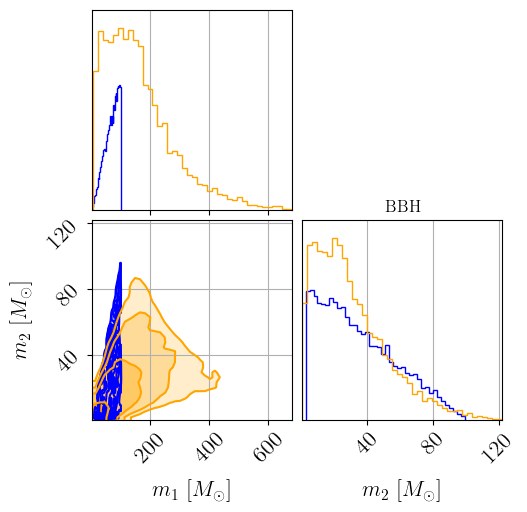

In [38]:
mc_prior  = bilby.core.prior.Uniform(minimum = mc_lower_bound_BBH, maximum = mc_upper_bound_BBH)
eta_prior = bilby.core.prior.Uniform(minimum = eta_lower_bound_BBH, maximum = eta_upper_bound_BBH)

# Draw samples from the priors
mc_samples  =  mc_prior.sample(size = N)
eta_samples = eta_prior.sample(size = N)

# Swap so that m1 > m2
swap = m1 < m2
m1[swap], m2[swap] = m2[swap], m1[swap]


# Convert 
total_mass = bilby.gw.conversion.chirp_mass_and_mass_ratio_to_total_mass(mc_samples, eta_samples) # auxiliary
mass_ratio = bilby.gw.conversion.symmetric_mass_ratio_to_mass_ratio(eta_samples) # auxiliary
m1, m2 = bilby.gw.conversion.total_mass_and_mass_ratio_to_component_masses(mass_ratio, total_mass)

# Plot
original_samples = np.vstack((m1_samples_BBH, m2_samples_BBH)).T
samples = np.vstack((m1, m2)).T
labels = [r"$m_1 \ [M_{\odot}]$", r"$m_2 \ [M_{\odot}]$"]
fig = corner.corner(original_samples, labels = labels, **default_corner_kwargs)
default_corner_kwargs["color"] = "orange"
corner.corner(samples, fig=fig, labels = labels, **default_corner_kwargs)
plt.title("BBH")
plt.show()
plt.close()

Now, the range for BNS:

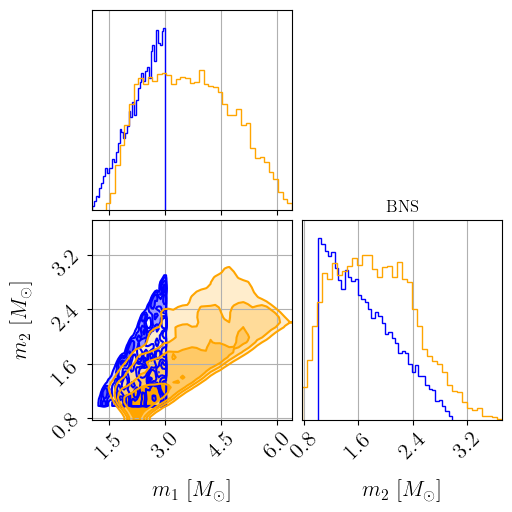

In [39]:
mc_prior  = bilby.core.prior.Uniform(minimum = mc_lower_bound_BNS, maximum = mc_upper_bound_BNS)
eta_prior = bilby.core.prior.Uniform(minimum = eta_lower_bound_BNS, maximum = eta_upper_bound_BNS)

# Draw samples from the priors
mc_samples  =  mc_prior.sample(size = N)
eta_samples = eta_prior.sample(size = N)

# Convert 
total_mass = bilby.gw.conversion.chirp_mass_and_mass_ratio_to_total_mass(mc_samples, eta_samples) # auxiliary
mass_ratio = bilby.gw.conversion.symmetric_mass_ratio_to_mass_ratio(eta_samples) # auxiliary
m1, m2 = bilby.gw.conversion.total_mass_and_mass_ratio_to_component_masses(mass_ratio, total_mass)

# Swap so that m1 > m2
swap = m1 < m2
m1[swap], m2[swap] = m2[swap], m1[swap]

# Plot
original_samples = np.vstack((m1_samples_BNS, m2_samples_BNS)).T
samples = np.vstack((m1, m2)).T
labels = [r"$m_1 \ [M_{\odot}]$", r"$m_2 \ [M_{\odot}]$"]
default_corner_kwargs["color"] = "blue"
fig = corner.corner(original_samples, labels = labels, **default_corner_kwargs)
default_corner_kwargs["color"] = "orange"
corner.corner(samples, fig=fig, labels = labels, **default_corner_kwargs)
plt.title("BNS")
plt.show()
plt.close()

In [40]:
print(mc_lower_bound_BNS)

0.8868251498507373
